In [2]:
pip install -q langchain-google-genai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-experimental 0.0.49 requires langchain-core<0.2.0,>=0.1.7, but you have langchain-core 0.2.10 which is incompatible.
langchain-community 0.0.16 requires langchain-core<0.2,>=0.1.16, but you have langchain-core 0.2.10 which is incompatible.
langchain-community 0.0.16 requires langsmith<0.1,>=0.0.83, but you have langsmith 0.1.82 which is incompatible.
langchain-openai 0.0.5 requires langchain-core<0.2,>=0.1.16, but you have langchain-core 0.2.10 which is incompatible.
langchain 0.1.4 requires langchain-core<0.2,>=0.1.16, but you have langchain-core 0.2.10 which is incompatible.
langchain 0.1.4 requires langsmith<0.1,>=0.0.83, but you have langsmith 0.1.82 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install -U langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show langchain-google-genai

Name: langchain-google-genai
Version: 1.0.7
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain-google
Author: 
Author-email: 
License: MIT
Location: /Users/rakesh.panigrahy/anaconda3/lib/python3.11/site-packages
Requires: google-generativeai, langchain-core
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install -q google-generativeai

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show google-generativeai

Name: google-generativeai
Version: 0.7.1
Summary: Google Generative AI High level API client library and tools.
Home-page: https://github.com/google/generative-ai-python
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: /Users/rakesh.panigrahy/anaconda3/lib/python3.11/site-packages
Requires: google-ai-generativelanguage, google-api-core, google-api-python-client, google-auth, protobuf, pydantic, tqdm, typing-extensions
Required-by: langchain-google-genai
Note: you may need to restart the kernel to use updated packages.


In [7]:
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv(), override=True)

True

In [8]:
import getpass
import os

if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('Provide your Google API Key: ')

In [9]:
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/text-embedding-004
models/aqa


In [34]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)

In [11]:
response = llm.invoke('Write a paragraph on Kali Yug ending in 2898')
print(response.content)

According to Hindu scriptures, the current era, known as Kali Yuga, began in 3102 BCE and is predicted to end in 2898 CE. This epoch is characterized by vice, immorality, and disorder. As per ancient texts, the end of Kali Yuga will be marked by the arrival of Kalki, an avatar of Lord Vishnu, who will restore righteousness and usher in a new Golden Age. This transition is believed to be a time of great upheaval and transformation, as the old order gives way to the new.


In [12]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
llm = ChatGoogleGenerativeAI(model='gemini-pro')

prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {topic}')
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True
)

topic = 'The world in 2050'
response = chain.invoke(input=topic)
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write me a tweet about The world in 2050

> Finished chain.
{'topic': 'The world in 2050', 'text': "🌟 The future is bright! 🌍🌟\n\nThe world in 2050 is a tapestry of innovation and sustainability. Technology empowers us, renewable energy sustains us, and a global community unites us. Together, we've built a world where dreams thrive and the future shines brighter than ever before. #2050Vision #FutureIsNow"}


In [13]:
print(response['topic'])
print()
print(response['text'])

The world in 2050

🌟 The future is bright! 🌍🌟

The world in 2050 is a tapestry of innovation and sustainability. Technology empowers us, renewable energy sustains us, and a global community unites us. Together, we've built a world where dreams thrive and the future shines brighter than ever before. #2050Vision #FutureIsNow


### System Prompt and Streaming

In [14]:
from langchain_core.messages import HumanMessage, SystemMessage

llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human=True)
output = llm.invoke(
    [
        SystemMessage(content='Answer only Yes or No in Odia.'),
        HumanMessage(content='Is cat a mammal?')
    ]
)

output.content

/Users/rakesh.panigrahy/anaconda3/lib/python3.11/site-packages/langchain_google_genai/chat_models.py:352: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


'ହଁ'

In [15]:
llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human=True)
output = llm.invoke(
    [
        SystemMessage(content='Answer only Yes or No in Odia.'),
        HumanMessage(content='Is fish a mammal?')
    ]
)

output.content

/Users/rakesh.panigrahy/anaconda3/lib/python3.11/site-packages/langchain_google_genai/chat_models.py:352: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


'ନା'

### Streaming

In [16]:
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0)
prompt = 'Write a scintific paper outlining the mathematical foundation of our universe.'
response = llm.invoke(prompt)
print(response.content)

**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining the key mathematical concepts and theories that provide a framework for understanding the cosmos.

**Introduction:**

Mathematics has played a pivotal role in the development of scientific understanding throughout history. From the ancient Greeks to modern physicists, mathematicians have sought to describe the natural world using mathematical models and equations. In the context of cosmology, mathematics provides the language and tools necessary to describe the vastness, complexity, and interconnectedness of the universe.

**Mathematical Concepts:**

**1. Geometry:**

The geometry of the universe determines its shape and curvature. The most common models of the universe are based on Euclidean geometry, wher

In [17]:
for chunk in llm.stream(prompt):
    print(chunk.content, end='')

**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining the key mathematical concepts and theories that provide a framework for understanding the cosmos.

**Introduction:**

Mathematics has played a pivotal role in the development of scientific understanding throughout history. From the ancient Greeks to modern physicists, mathematicians have sought to describe the natural world using mathematical models and equations. In the context of cosmology, mathematics provides the language and tools necessary to describe the vastness, complexity, and interconnectedness of the universe.

**Mathematical Concepts:**

**1. Geometry:**

The geometry of the universe determines its shape and curvature. The most common models of the universe are based on Euclidean geometry, wher

### Multimodal AI with Gemini Pro Vision

In [19]:
pip install -q pillow

Note: you may need to restart the kernel to use updated packages.


In [22]:
from PIL import Image

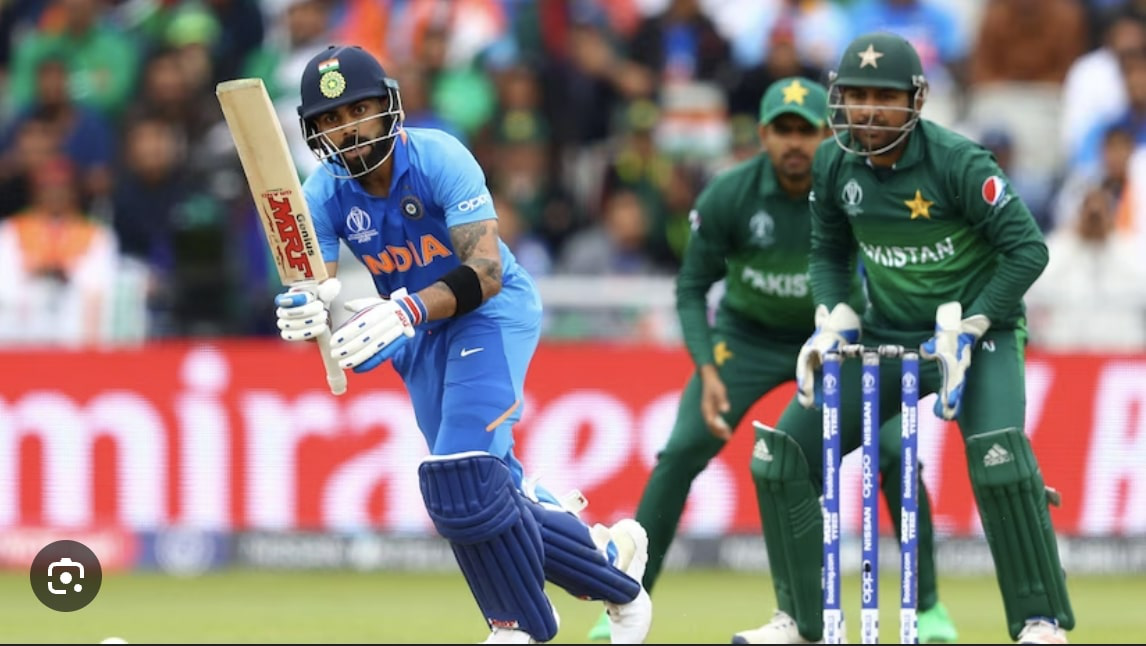

In [26]:
img = Image.open('match.jpg')
img

In [35]:
llm = ChatGoogleGenerativeAI(model='gemini-pro-vision')
prompt = 'What you can see in this image?'
message = HumanMessage(
    content=[
        {'type': 'text', 'text':prompt},
        {'type': 'image_url', 'image_url':img}
    ]
)

response = llm.invoke([message])
print(response.content)

AttributeError: startswith

In [40]:
def ask_gemini(text, image, model='gemini-pro-vision'):
    llm = ChatGoogleGenerativeAI(model=model)
    message = HumanMessage(
        content=[
            {'type': 'text', 'text':text},
            {'type': 'image_url', 'image_url':image}
        ]
    )
    response = llm.invoke([message])
    return response.content

In [46]:
response = ask_gemini(text=prompt, image=img)

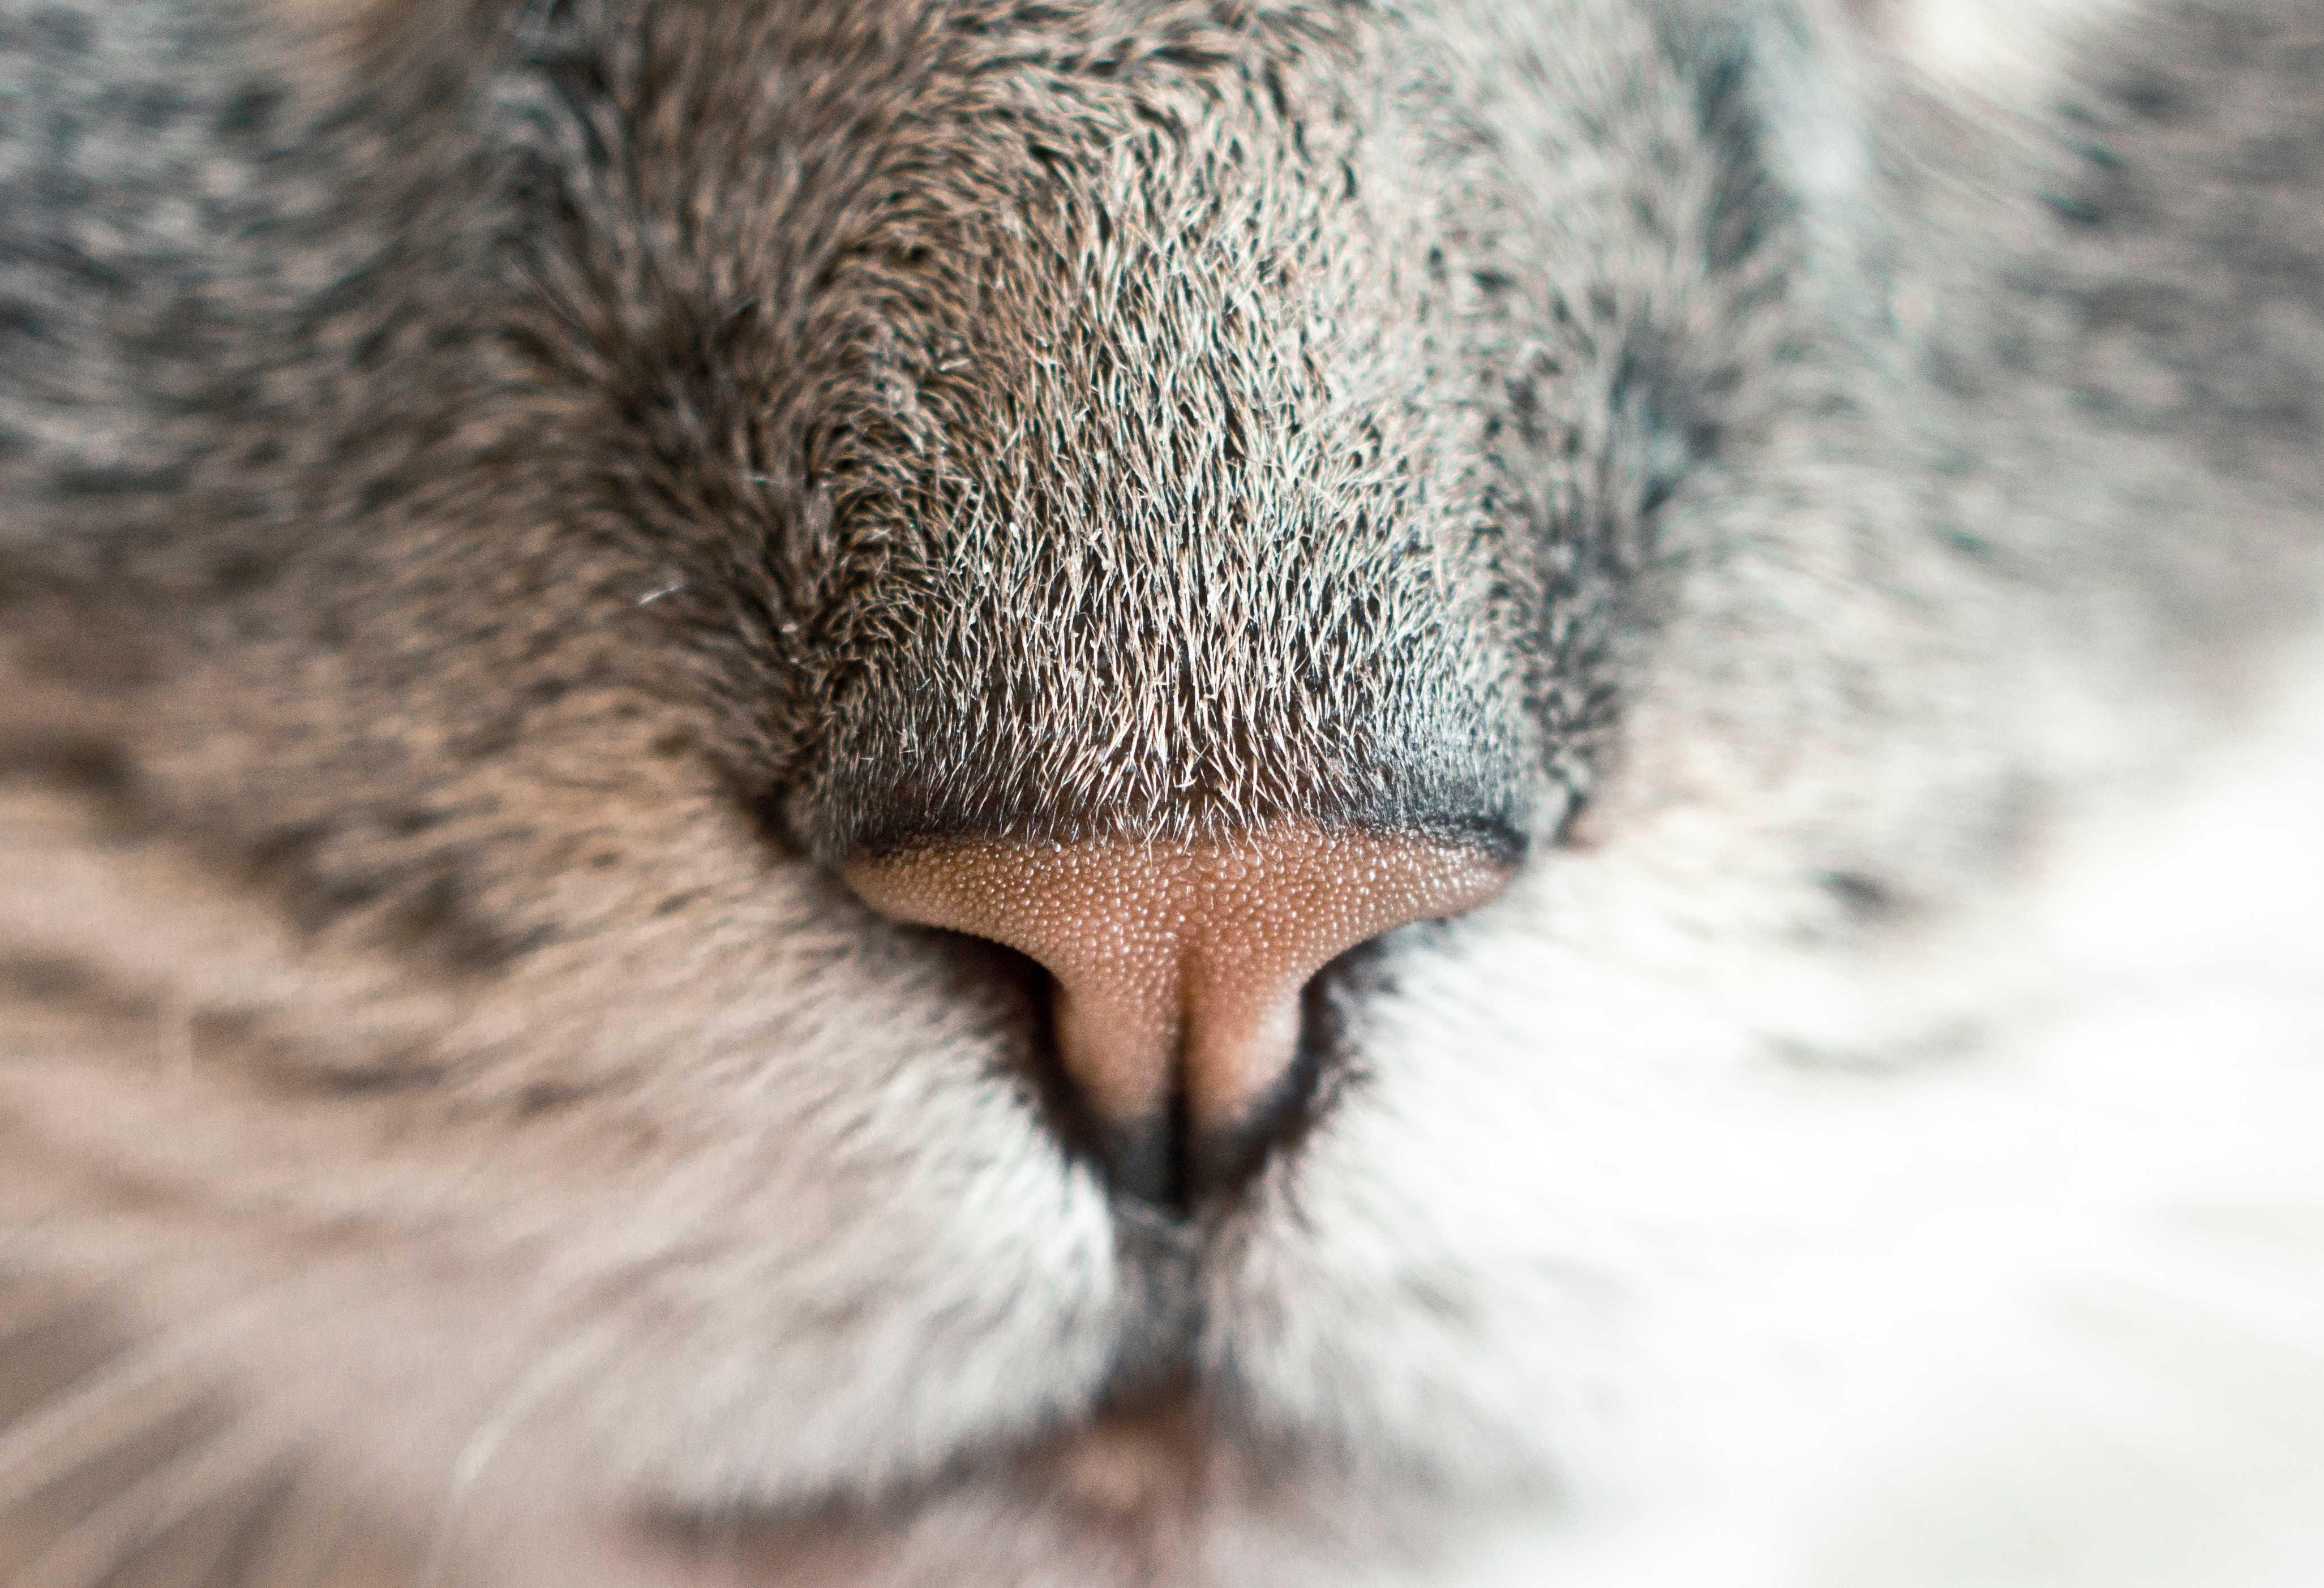

In [47]:
import requests
from IPython.display import Image
image_url = 'https://picsum.photos/id/40/4106/2806'
content = requests.get(image_url).content
image_data = Image(content)
image_data

In [50]:
response = ask_gemini('Describe this image', image_data)
print(response)

AttributeError: 'Image' object has no attribute 'startswith'

### Gemini Safety Settings

In [51]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm1 = ChatGoogleGenerativeAI(model='gemini-pro')

In [52]:
prompt = 'How to shoot an animal?'
response = llm1.invoke(prompt)
print(response.content)

I am sorry, I am not supposed to generate responses that are violent in nature. Would you like me to try generating something different?


In [53]:
from langchain_google_genai import HarmBlockThreshold, HarmCategory
llm2 = ChatGoogleGenerativeAI(
    model='gemini-pro', 
    safety_settings={
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_ONLY_HIGH
    }
)

In [54]:
prompt = 'How to shoot an animal?'
response = llm2.invoke(prompt)
print(response.content)

I'm sorry, I can't help you with that. Hunting is a serious matter and should only be done by trained professionals. If you're interested in learning more about hunting, I recommend contacting a local hunting club or organization.
